<a href="https://colab.research.google.com/github/Susmitha-Katta/Breast-Cancer-Classification/blob/main/Breast_Cancer_prediction_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("SEER Breast Cancer Dataset 2.csv")
df

,Age,Marital Status,Unnamed: 2,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,Married (including common law),NaN,2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,Married (including common law),NaN,2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,Married (including common law),NaN,2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,Divorced,NaN,1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,Married (including common law),NaN,2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,Married (including common law),NaN,1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,Married (including common law),NaN,1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,Divorced,NaN,1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,Married (including common law),NaN,1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive


In [ ]:
df.shape

(4024, 15)

Checking for missing values

In [ ]:
df.isnull().sum()

Age                          0
Marital Status               0
Unnamed: 2                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64

In [ ]:
df = df.drop('Unnamed: 2',axis='columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Marital Status          4024 non-null   object
 2   T Stage                 4024 non-null   int64 
 3   N Stage                 4024 non-null   object
 4   6th Stage               4024 non-null   object
 5   Grade                   4024 non-null   object
 6   A Stage                 4024 non-null   object
 7   Tumor Size              4024 non-null   int64 
 8   Estrogen Status         4024 non-null   object
 9   Progesterone Status     4024 non-null   object
 10  Regional Node Examined  4024 non-null   int64 
 11  Reginol Node Positive   4024 non-null   int64 
 12  Survival Months         4024 non-null   int64 
 13  Status                  4024 non-null   object
dtypes: int64(6), object(8)
memory usage: 440.2+ KB


Encoding

In [ ]:
df.Status.replace({
    'Dead':0,
    'Alive':1
},inplace=True)

In [ ]:
df['N Stage'].unique()

array(['N3', 'N2', 'N1'], dtype=object)

In [ ]:
df['N Stage'].replace({
    'N1':1,
    'N2':2,
    'N3':3
},inplace=True)

In [ ]:
df['6th Stage'].unique()

array(['IIIC', 'IIIA', 'IIB', 'IIA', 'IIIB'], dtype=object)

In [ ]:
df['6th Stage'].replace({
    'IIA':21,
    'IIB':22,
    'IIIA':31,
    'IIIB':32,
    'IIIC':33
},inplace=True)

In [ ]:
df.Grade.unique()

array(['Moderately differentiated; Grade II',
       'Poorly differentiated; Grade III', 'Well differentiated; Grade I',
       'Undifferentiated; anaplastic; Grade IV'], dtype=object)

In [ ]:
df.Grade.replace({
    'Well differentiated; Grade I':1,
    'Moderately differentiated; Grade II':2,
    'Poorly differentiated; Grade III':3,
    'Undifferentiated; anaplastic; Grade IV':4
},inplace=True)

In [ ]:
df['A Stage'].unique()

array(['Regional', 'Distant'], dtype=object)

In [ ]:
df['A Stage'].replace({
    'Regional':0,
    'Distant':1
},inplace=True)

In [ ]:
df['Estrogen Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
df['Estrogen Status'].replace({
    'Negative':0,
    'Positive':1
},inplace=True)

In [ ]:
df['Progesterone Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
df['Progesterone Status'].replace({
    'Negative':0,
    'Positive':1
},inplace=True)

In [ ]:
df['Marital Status'].unique()

array(['Married (including common law)', 'Divorced',
       'Single (never married)', 'Widowed', 'Separated'], dtype=object)

In [ ]:
df['Marital Status'].replace({
    'Married (including common law)':0,
    'Divorced':1,
    'Single (never married)':2,
    'Widowed':3,
    'Separated':4
},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Marital Status          4024 non-null   int64
 2   T Stage                 4024 non-null   int64
 3   N Stage                 4024 non-null   int64
 4   6th Stage               4024 non-null   int64
 5   Grade                   4024 non-null   int64
 6   A Stage                 4024 non-null   int64
 7   Tumor Size              4024 non-null   int64
 8   Estrogen Status         4024 non-null   int64
 9   Progesterone Status     4024 non-null   int64
 10  Regional Node Examined  4024 non-null   int64
 11  Reginol Node Positive   4024 non-null   int64
 12  Survival Months         4024 non-null   int64
 13  Status                  4024 non-null   int64
dtypes: int64(14)
memory usage: 440.2 KB


Data Visualization

Histogram

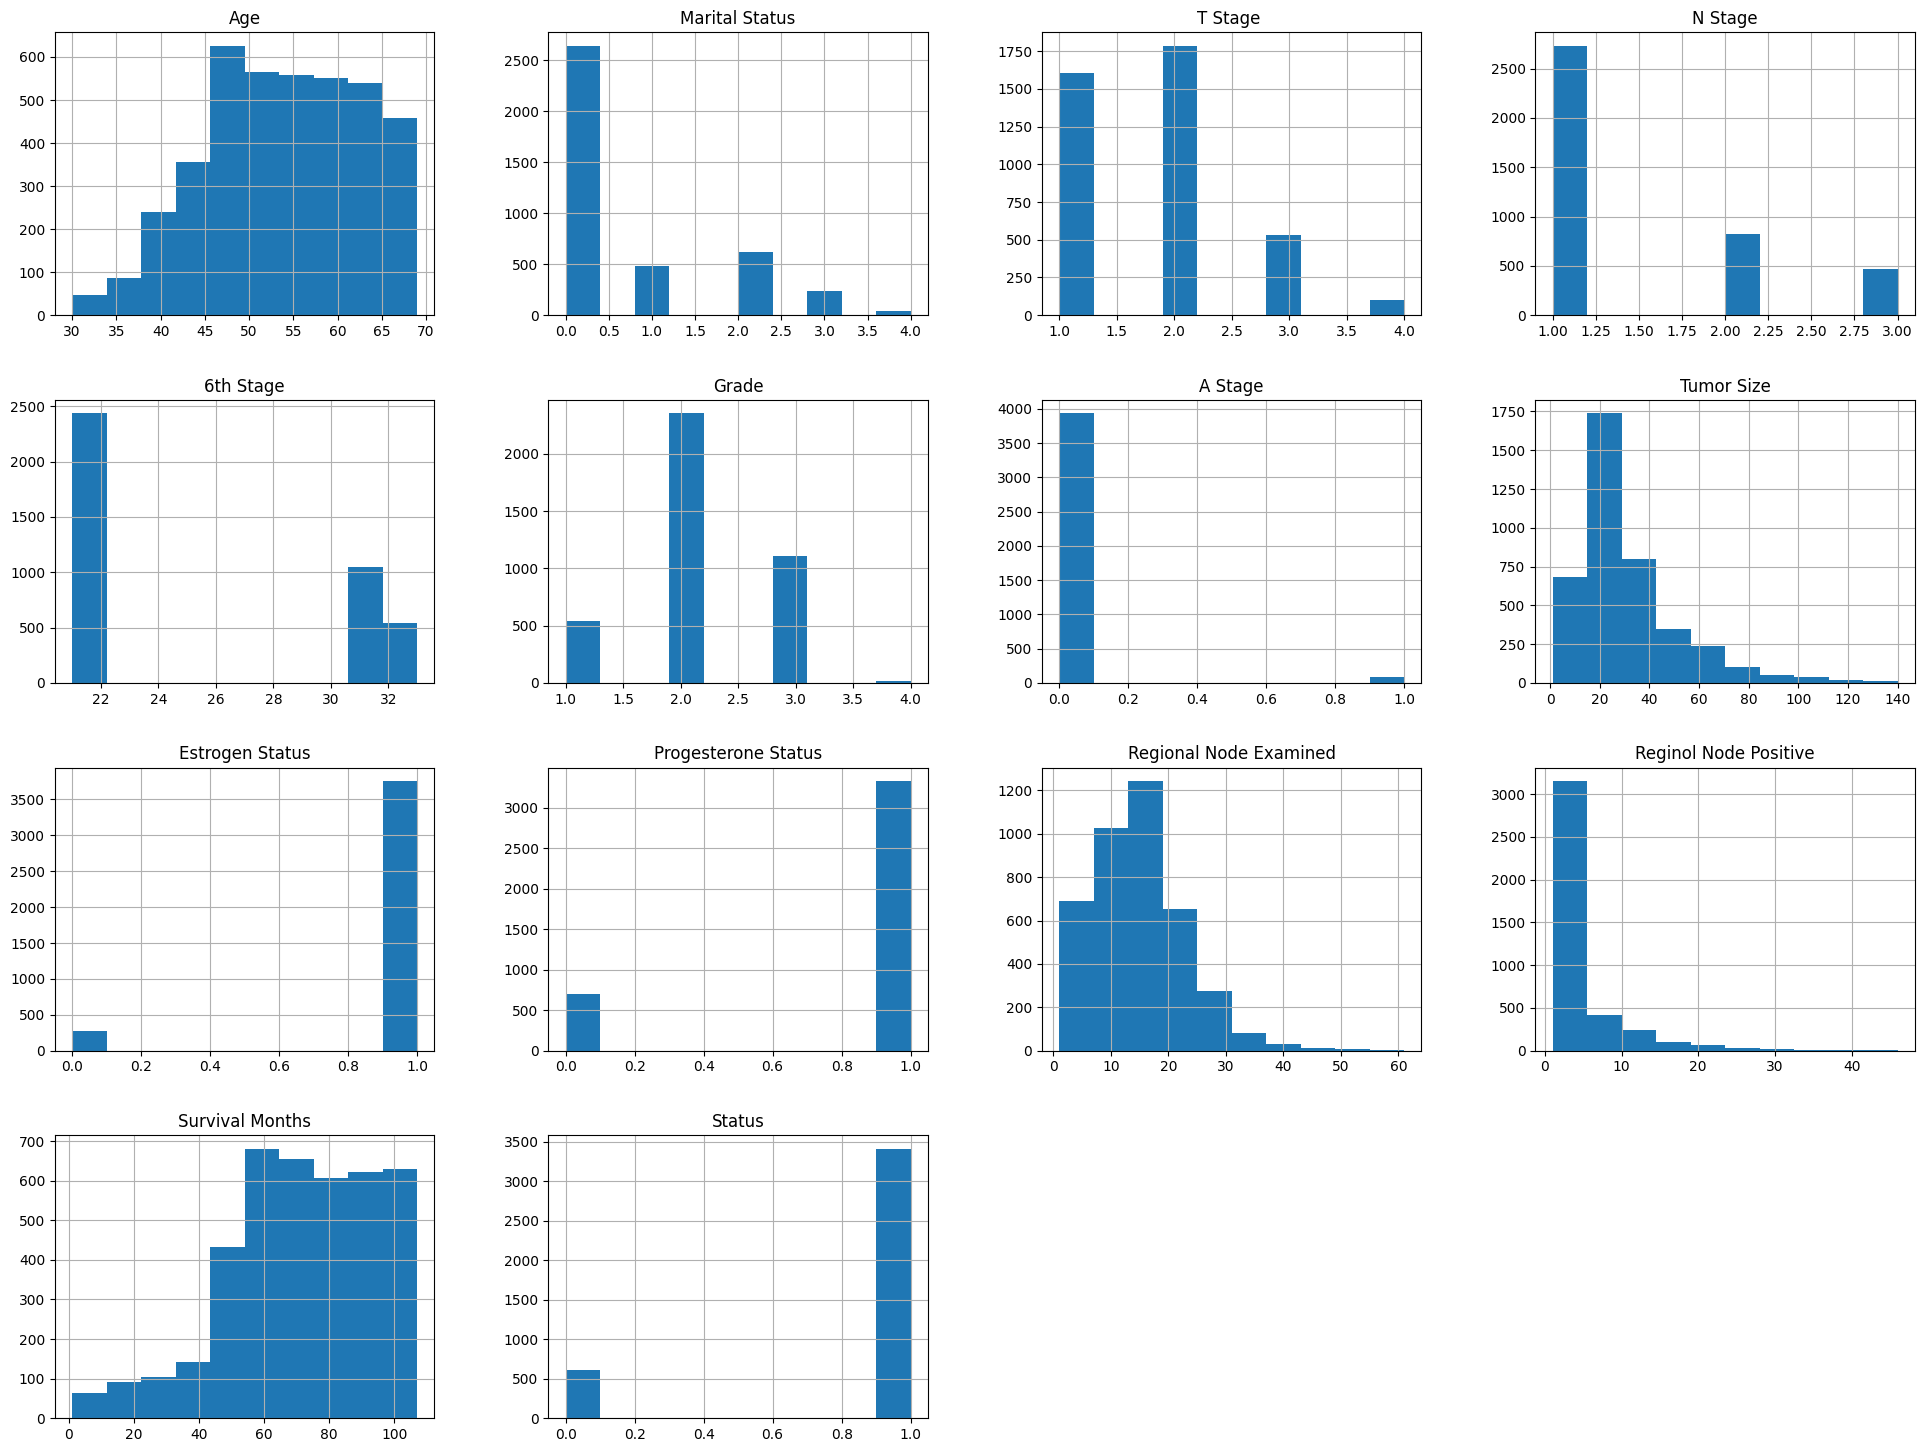

In [ ]:
df.hist(figsize=(24, 18))
plt.show()

Box Plot of feature vs target variables

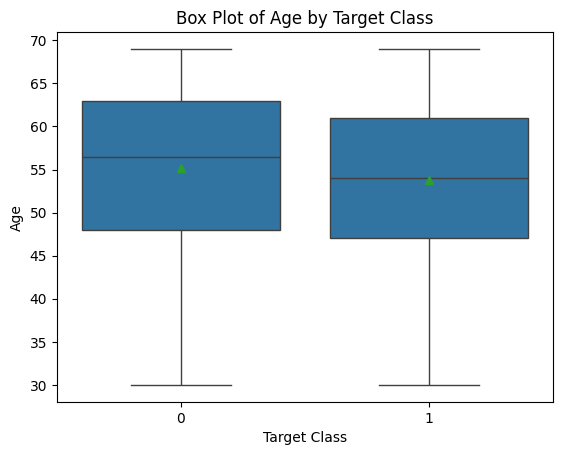

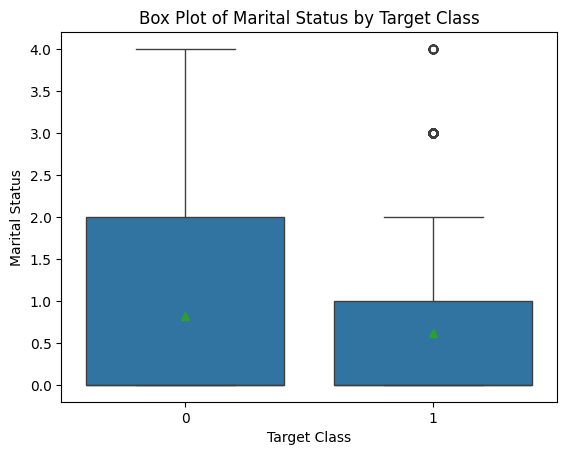

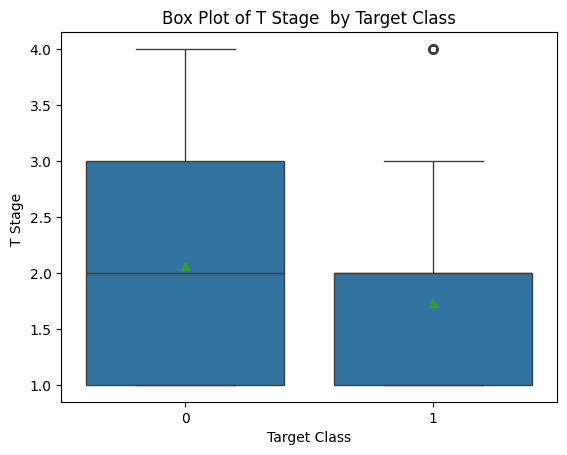

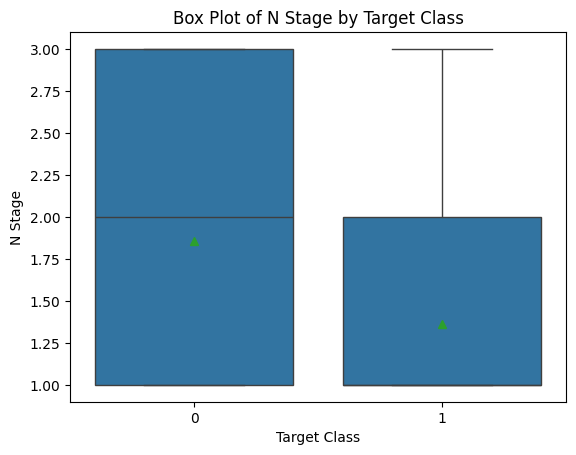

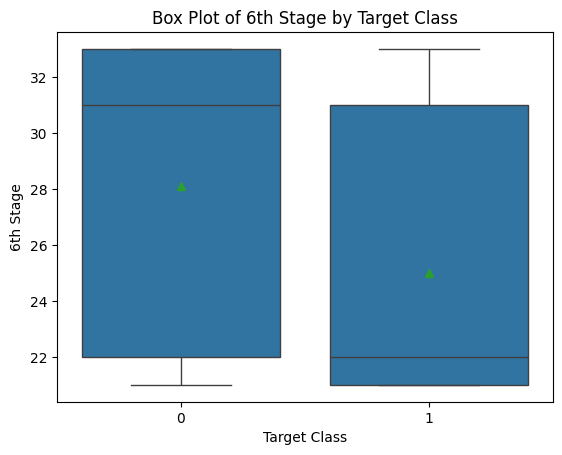

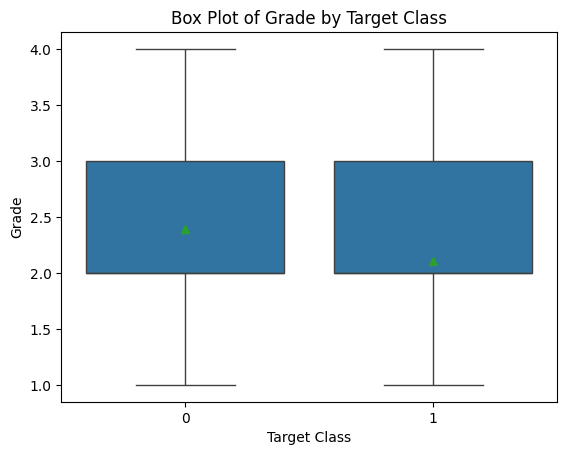

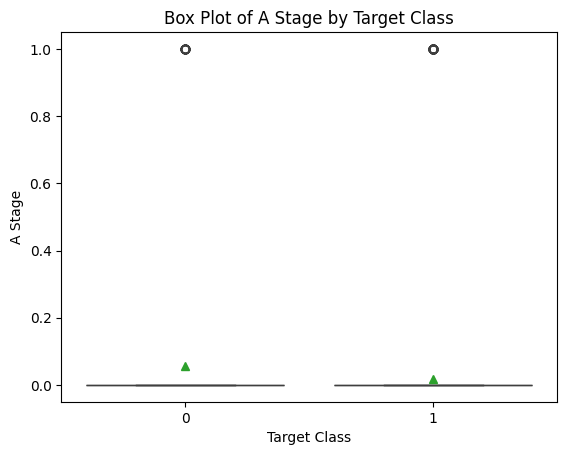

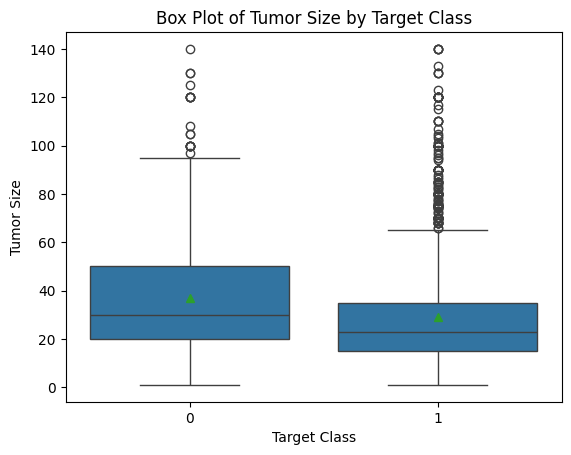

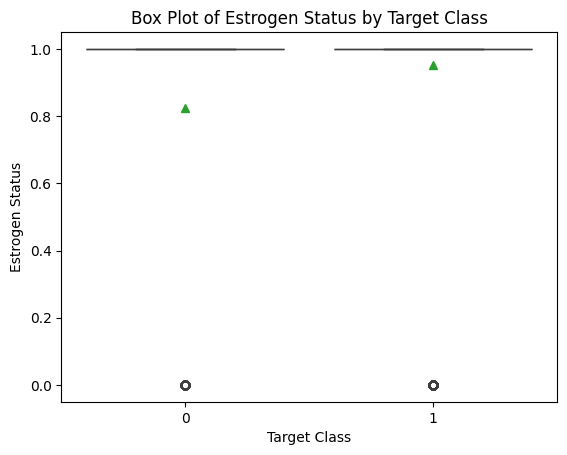

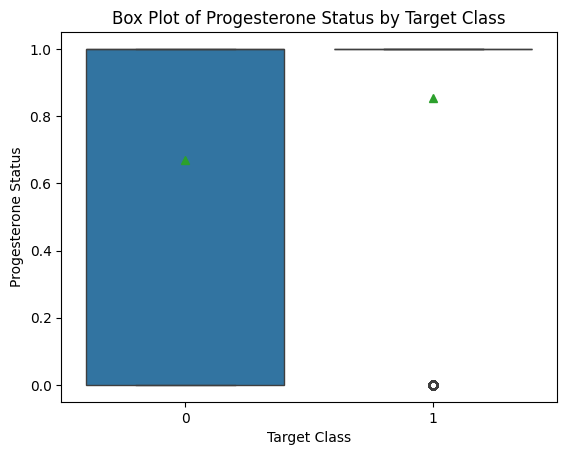

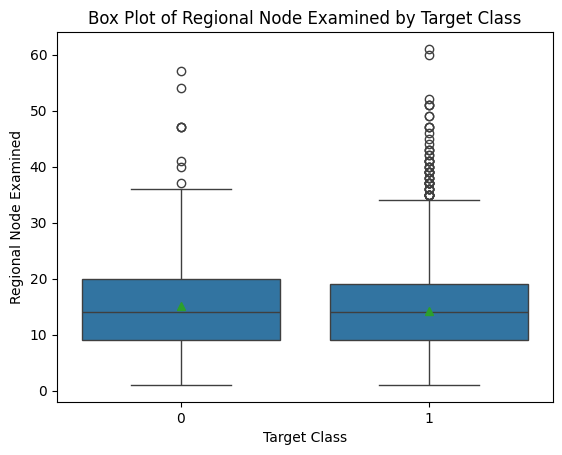

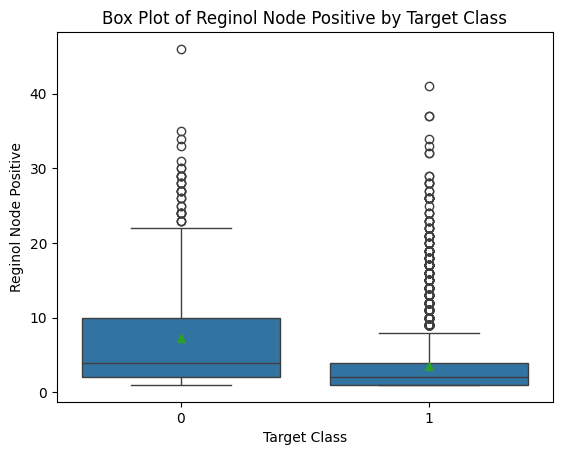

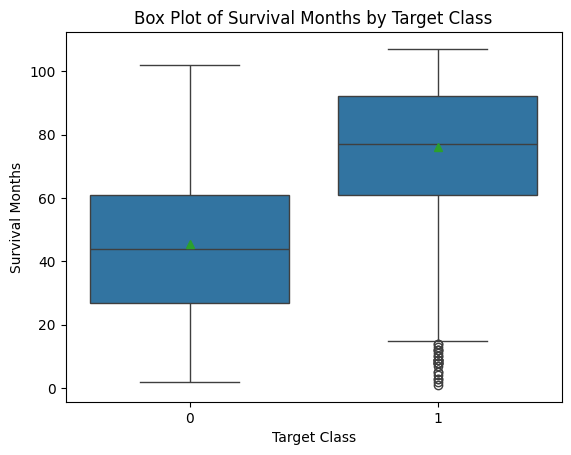

In [ ]:
features = df.columns.tolist()  # Get all feature names
for feature in features:
  if feature != 'Status':  # Skip the target variable
    sns.boxplot(
        x = "Status",
        y = feature,
        showmeans=True,
        data=df
    )
    plt.xlabel('Target Class')
    plt.ylabel(feature)  # Set feature name as y-axis label
    plt.title(f'Box Plot of {feature} by Target Class')
    plt.show()

In [ ]:
X = df.drop('Status',axis='columns')
y = df.Status

Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.22429611, -0.64036962,  0.28115846, ...,  0.57329087,
         1.33927484, -3.06729118],
       [-0.77796819, -0.64036962,  0.28115846, ...,  1.31415342,
         0.94778552, -3.02365846],
       [ 1.45367139, -0.64036962,  0.28115846, ..., -1.27886548,
        -0.61817175, -3.02365846],
       ...,
       [-0.10847632,  0.35034447, -1.02528685, ..., -1.27886548,
        -0.42242709,  1.55777696],
       [ 0.67259754, -0.64036962, -1.02528685, ..., -0.04409458,
        -0.42242709,  1.55777696],
       [ 0.8957615 ,  0.35034447, -1.02528685, ..., -1.64929675,
        -0.61817175,  1.55777696]])

Normalization (MinMax Normalization)

In [ ]:
transformer = Normalizer().fit(X)
transformer

Normalizer()

In [ ]:
X_normalized = transformer.transform(X)
X_normalized

array([[0.60569388, 0.        , 0.02817181, ..., 0.26763218, 0.15494495,
        0.0140859 ],
       [0.61090501, 0.        , 0.02599596, ..., 0.32494947, 0.11698181,
        0.02599596],
       [0.89254032, 0.        , 0.02664299, ..., 0.05328599, 0.0133215 ,
        0.02664299],
       ...,
       [0.43555433, 0.00821801, 0.00821801, ..., 0.03287202, 0.01643601,
        0.87932666],
       [0.4776519 , 0.        , 0.00796087, ..., 0.11145211, 0.01592173,
        0.85181256],
       [0.49310509, 0.00795331, 0.00795331, ..., 0.00795331, 0.00795331,
        0.85100395]])

Spliting of data into Training and testing dataset

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=30)

In [ ]:
print("X_train size: ",X_train.shape)
print("X_test size: ",X_test.shape)
print("y_train size: ",y_train.shape)
print("y_test size: ",y_test.shape)

X_train size:  (3219, 13)
X_test size:  (805, 13)
y_train size:  (3219,)
y_test size:  (805,)


Logistic Regression

Training of data

In [ ]:
lreg1 = LogisticRegression()
lreg1.fit(X_train,y_train)

LogisticRegression()

Evaluation of Model

Accuracy of Training dataset

In [ ]:
train_pred = lreg1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.8940664802733769

Accuracy of testing set

In [ ]:
test_pred = lreg1.predict(X_test)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9043478260869565

confusion matrix

In [ ]:
cm1 = confusion_matrix(y_test,test_pred)
cm1

array([[ 37,  60],
       [ 17, 691]])

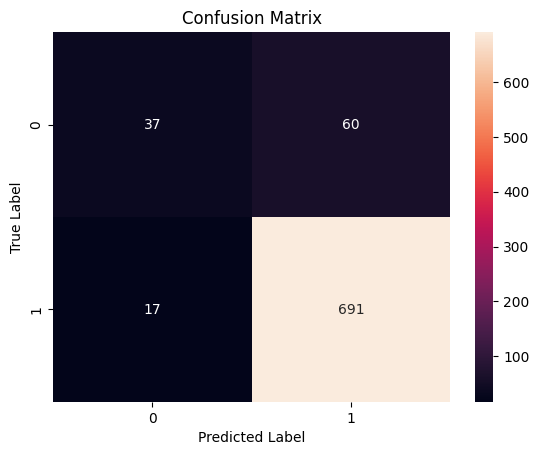

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

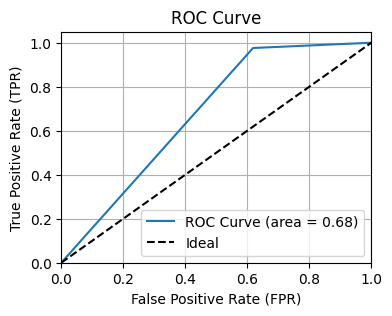

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Area Under ROC Curve

In [ ]:
roc_auc_score(y_test, lreg1.predict(X_test))
roc_auc_score(y_test, lreg1.decision_function(X_test))

0.8594559962723514

In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.69      0.38      0.49        97
           1       0.92      0.98      0.95       708

    accuracy                           0.90       805
   macro avg       0.80      0.68      0.72       805
weighted avg       0.89      0.90      0.89       805



Random Forest

In [ ]:
rf1 = RandomForestClassifier(n_estimators=5)
rf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

Training set accuracy

In [ ]:
train_pred = rf1.predict(X_train)
train_accuracy =  accuracy_score(y_train,train_pred)
train_accuracy

0.9810500155327742

Testing set accuracy

In [ ]:
test_pred = rf1.predict(X_test)
test_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.893167701863354

confusion matrix

In [ ]:
cm2 = confusion_matrix(y_test,test_pred)
cm2

array([[ 44,  53],
       [ 33, 675]])

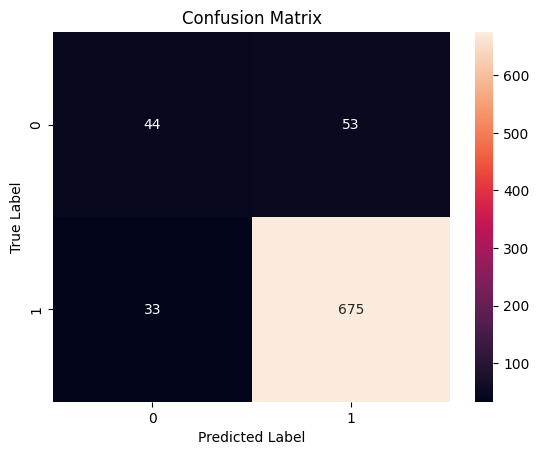

In [ ]:

sns.heatmap(cm2, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

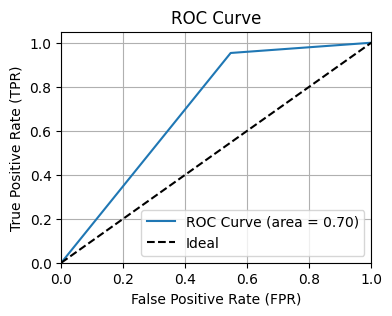

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.57      0.45      0.51        97
           1       0.93      0.95      0.94       708

    accuracy                           0.89       805
   macro avg       0.75      0.70      0.72       805
weighted avg       0.88      0.89      0.89       805



SVM

In [ ]:
svm1 = SVC()
svm1.fit(X_train,y_train)

SVC()

Training set accuracy

In [ ]:
X_train_pred = svm1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.9046287666977322

Testing set accuracy

In [ ]:
test_pred = svm1.predict(X_test)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
testing_accuracy = accuracy_score(y_test,test_pred)
testing_accuracy

0.9093167701863354

confusion matrix

In [ ]:
cm3 = confusion_matrix(y_test,test_pred)
cm3

array([[ 31,  66],
       [  7, 701]])

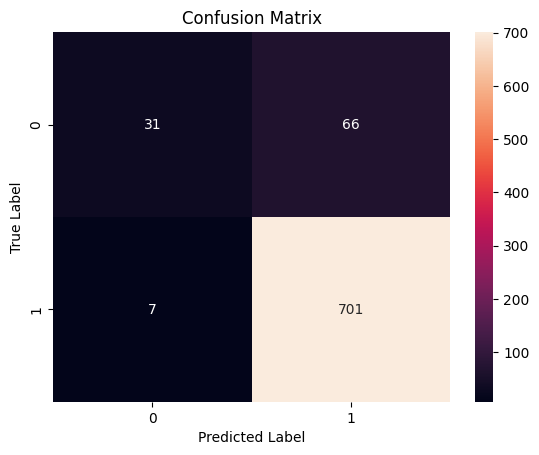

In [ ]:

sns.heatmap(cm3, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

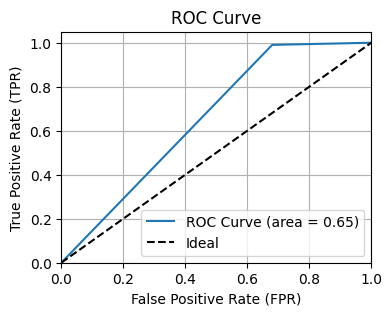

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.82      0.32      0.46        97
           1       0.91      0.99      0.95       708

    accuracy                           0.91       805
   macro avg       0.86      0.65      0.70       805
weighted avg       0.90      0.91      0.89       805



Naive Bayes

In [ ]:
nb1 = BernoulliNB()
nb1.fit(X_train,y_train)

BernoulliNB()

Training set accuracy

In [ ]:
train_pred = nb1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.8117427772600186

Testing set accuracy

In [ ]:
test_pred = nb1.predict(X_test)
test_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
testing_accuracy

0.9093167701863354

confusion matrix

In [ ]:
cm4 = confusion_matrix(y_test,test_pred)
cm4

array([[ 42,  55],
       [ 94, 614]])

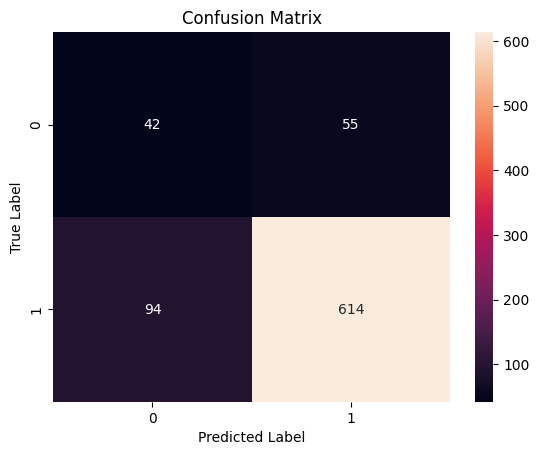

In [ ]:

sns.heatmap(cm4, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

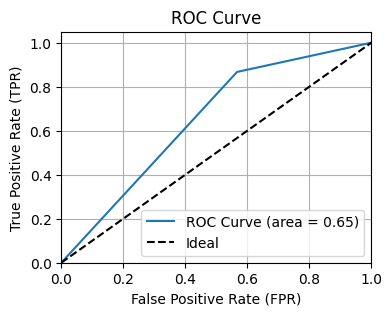

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.31      0.43      0.36        97
           1       0.92      0.87      0.89       708

    accuracy                           0.81       805
   macro avg       0.61      0.65      0.63       805
weighted avg       0.84      0.81      0.83       805



KNN

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train,y_train)

KNeighborsClassifier()

Training set accuracy

In [ ]:
X_train_pred = knn1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.9061820441130786

Testing set accuracy

In [ ]:
X_test_pred = knn1.predict(X_test)
test_accuracy = accuracy_score(y_test,X_test_pred)
test_accuracy

0.8956521739130435

confusion matrix

In [ ]:
cm5 = confusion_matrix(y_test,test_pred)
cm5

array([[ 42,  55],
       [ 94, 614]])

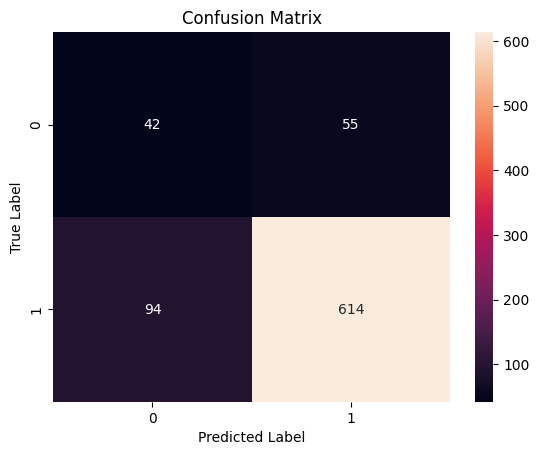

In [ ]:

sns.heatmap(cm5, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC Curve

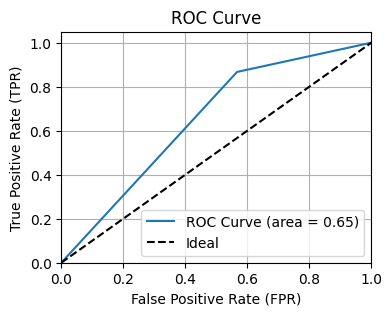

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.31      0.43      0.36        97
           1       0.92      0.87      0.89       708

    accuracy                           0.81       805
   macro avg       0.61      0.65      0.63       805
weighted avg       0.84      0.81      0.83       805



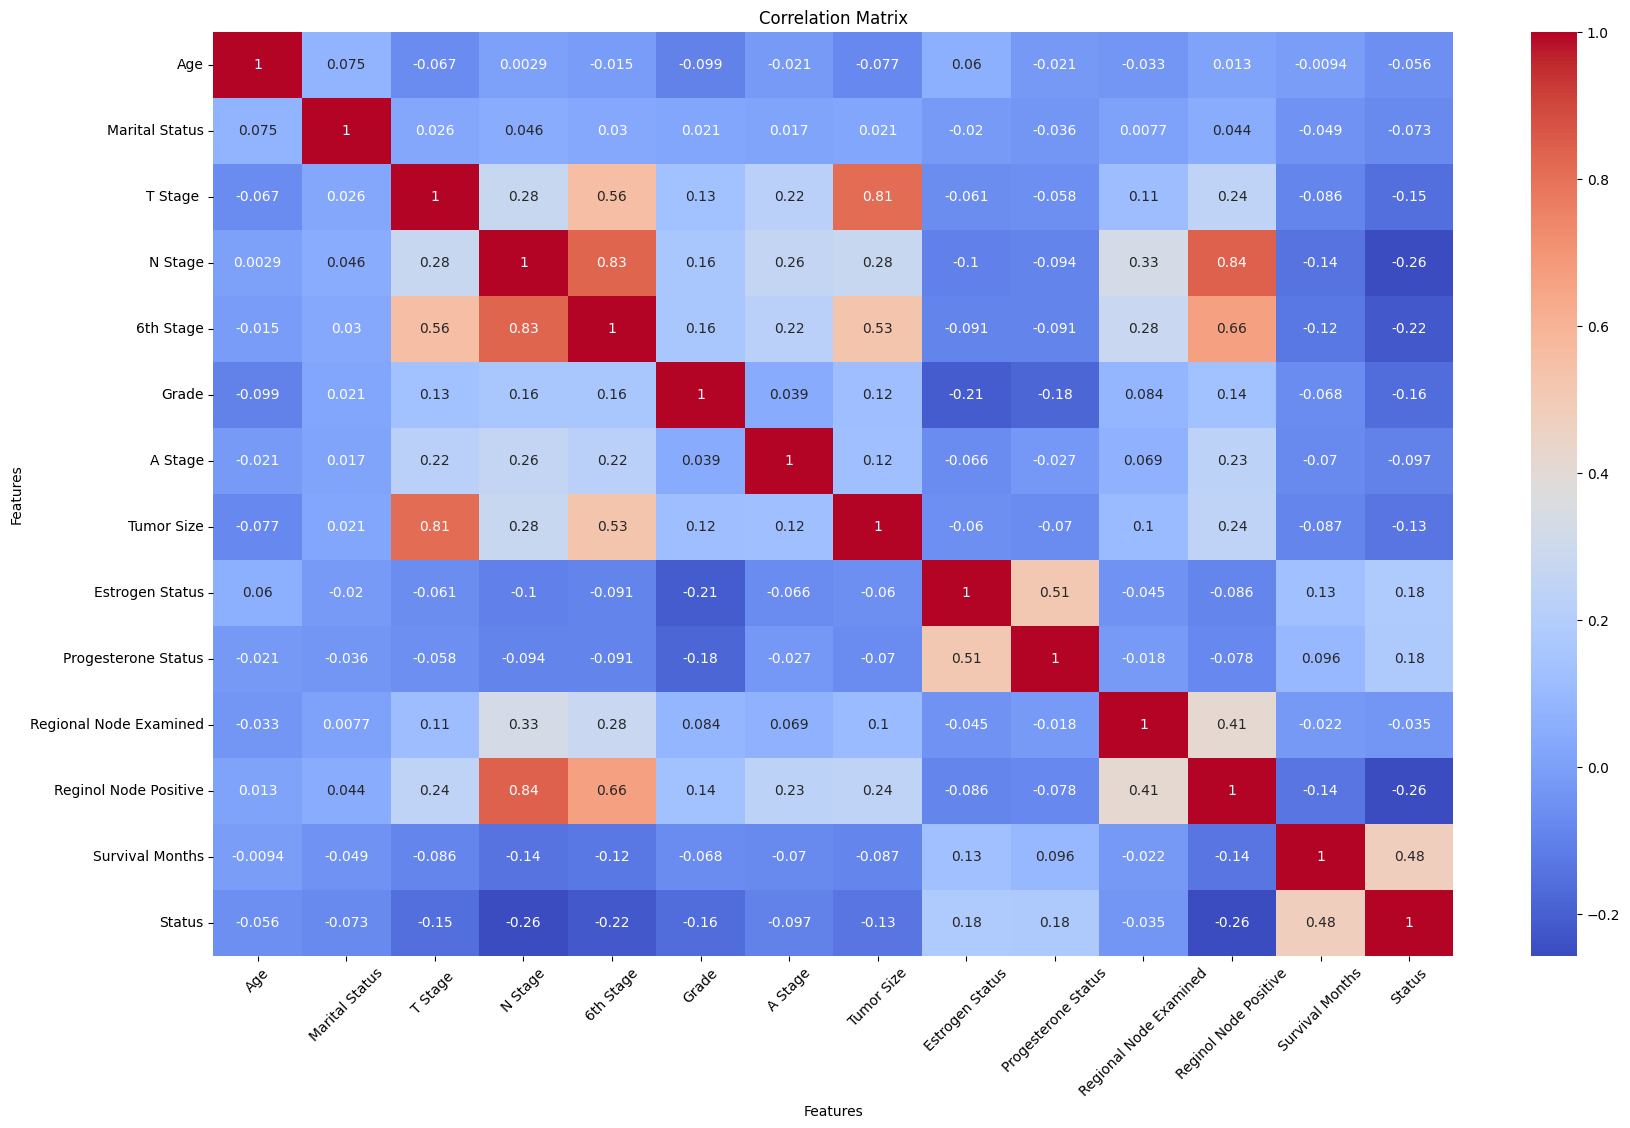

In [ ]:
correlation_matrix = df.corr()
# Create a new figure for the plot
plt.figure(figsize=(20, 12))

# Create a heatmap with annotations (values) and color gradient
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add labels for the x and y axes
plt.xlabel('Features')
plt.ylabel('Features')

# Add a title for the plot
plt.title('Correlation Matrix')

# Rotate x-axis labels for better readability with many features
plt.xticks(rotation=45)
plt.show()


T-Stage - Tumor Size(0.81)
N-stage - Reginol Node Positive(0.84), 6th Stage(0.83)

Feature Reduction

In [ ]:
df1 = df.copy()

In [ ]:
df1 = df1.drop(['Tumor Size','Reginol Node Positive','6th Stage'],axis='columns')

In [ ]:
print(df.shape)
print(df1.shape)

(4024, 14)
(4024, 11)


In [ ]:
X1 = df1.drop('Status',axis='columns')
y1 = df1.Status

In [ ]:
X1_scaled = scaler.fit_transform(X1)

Logistic Regression

Spliting of data into Training and testing dataset

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X1_scaled,y1,test_size=0.2,random_state=30)

In [ ]:
print("X_train size: ",X_train.shape)
print("X_test size: ",X_test.shape)
print("y_train size: ",y_train.shape)
print("y_test size: ",y_test.shape)

X_train size:  (3219, 10)
X_test size:  (805, 10)
y_train size:  (3219,)
y_test size:  (805,)


Logistic Regression

Training of data

In [ ]:
lreg1 = LogisticRegression()
lreg1.fit(X_train,y_train)

LogisticRegression()

Evaluation of Model

Accuracy of Training dataset

In [ ]:
train_pred = lreg1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.8940664802733769

Accuracy of testing set

In [ ]:
test_pred = lreg1.predict(X_test)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.901863354037267

Confusion matrix

In [ ]:
cm1 = confusion_matrix(y_test,test_pred)
cm1

array([[ 36,  61],
       [ 18, 690]])

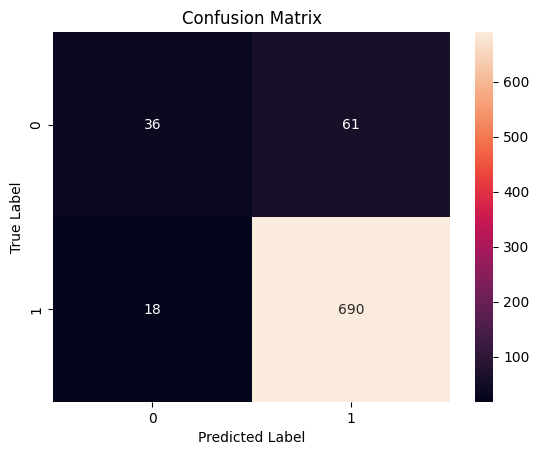

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

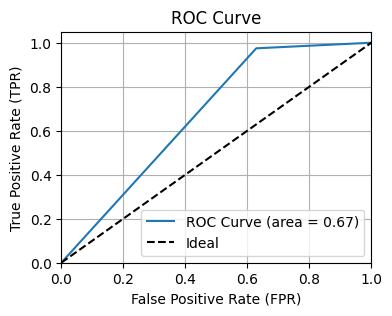

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.67      0.37      0.48        97
           1       0.92      0.97      0.95       708

    accuracy                           0.90       805
   macro avg       0.79      0.67      0.71       805
weighted avg       0.89      0.90      0.89       805



Random Forest

In [ ]:
rf1 = RandomForestClassifier(n_estimators=5)
rf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

Training set accuracy

In [ ]:
train_pred = rf1.predict(X_train)
train_accuracy =  accuracy_score(y_train,train_pred)
train_accuracy

0.9819819819819819

Testing set accuracy

In [ ]:
test_pred = rf1.predict(X_test)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9006211180124224

confusion matrix

In [ ]:
cm2 = confusion_matrix(y_test,test_pred)
cm2

array([[ 44,  53],
       [ 27, 681]])

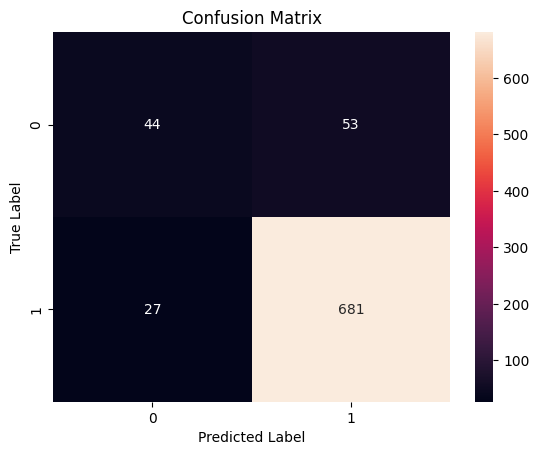

In [ ]:

sns.heatmap(cm2, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

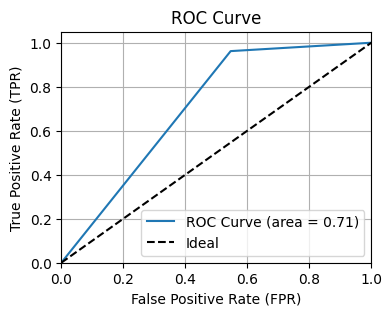

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.62      0.45      0.52        97
           1       0.93      0.96      0.94       708

    accuracy                           0.90       805
   macro avg       0.77      0.71      0.73       805
weighted avg       0.89      0.90      0.89       805



SVM

In [ ]:
svm1 = SVC()
svm1.fit(X_train,y_train)

SVC()

Training set accuracy

In [ ]:
X_train_pred = svm1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.9030754892823858

Testing set accuracy

In [ ]:
test_pred = svm1.predict(X_test)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
testing_accuracy = accuracy_score(y_test,test_pred)
testing_accuracy

0.9080745341614906

confusion matrix

In [ ]:
cm3 = confusion_matrix(y_test,test_pred)
cm3

array([[ 33,  64],
       [ 10, 698]])

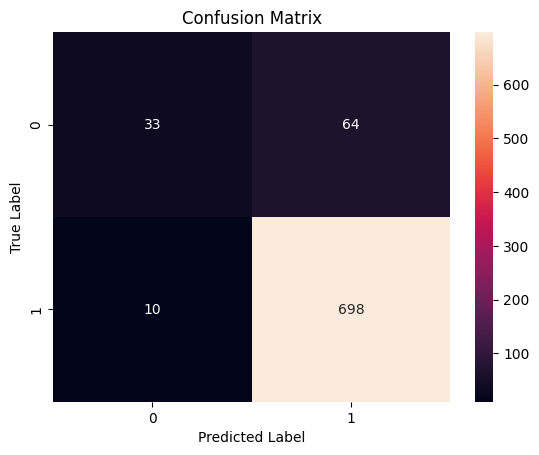

In [ ]:

sns.heatmap(cm3, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

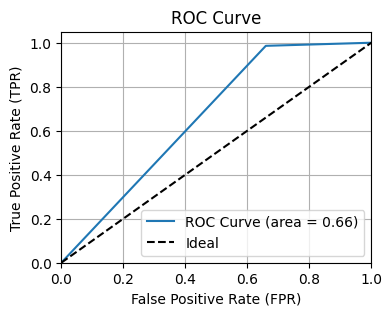

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.77      0.34      0.47        97
           1       0.92      0.99      0.95       708

    accuracy                           0.91       805
   macro avg       0.84      0.66      0.71       805
weighted avg       0.90      0.91      0.89       805



Naive Bayes

In [ ]:
nb1 = BernoulliNB()
nb1.fit(X_train,y_train)

BernoulliNB()

Training set accuracy

In [ ]:
train_pred = nb1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.8524386455420938

Testing set accuracy

In [ ]:
test_pred = nb1.predict(X_test)
test_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.8708074534161491

confusion matrix

In [ ]:
cm4 = confusion_matrix(y_test,test_pred)
cm4

array([[ 34,  63],
       [ 41, 667]])

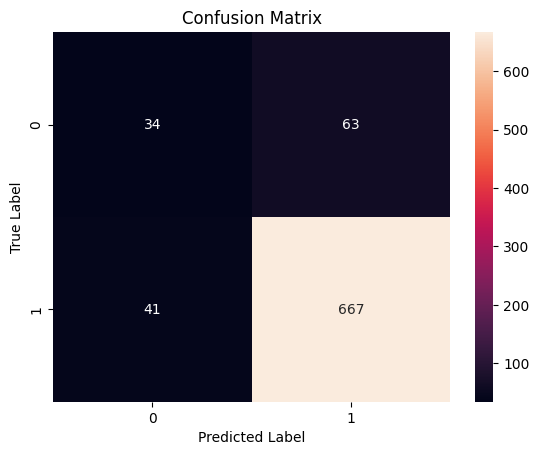

In [ ]:

sns.heatmap(cm4, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

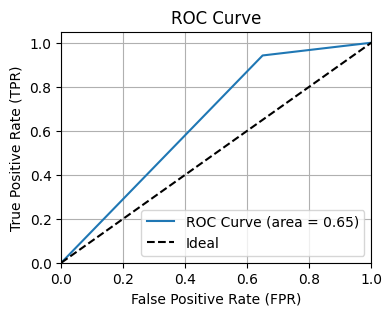

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.45      0.35      0.40        97
           1       0.91      0.94      0.93       708

    accuracy                           0.87       805
   macro avg       0.68      0.65      0.66       805
weighted avg       0.86      0.87      0.86       805



KNN

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train,y_train)

KNeighborsClassifier()

Training set accuracy

In [ ]:
X_train_pred = knn1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.9005902454178316

Testing set accuracy

In [ ]:
X_test_pred = knn1.predict(X_test)
test_accuracy = accuracy_score(y_test,X_test_pred)
test_accuracy

0.8968944099378882

confusion matrix

In [ ]:
cm5 = confusion_matrix(y_test,test_pred)
cm5

array([[ 34,  63],
       [ 41, 667]])

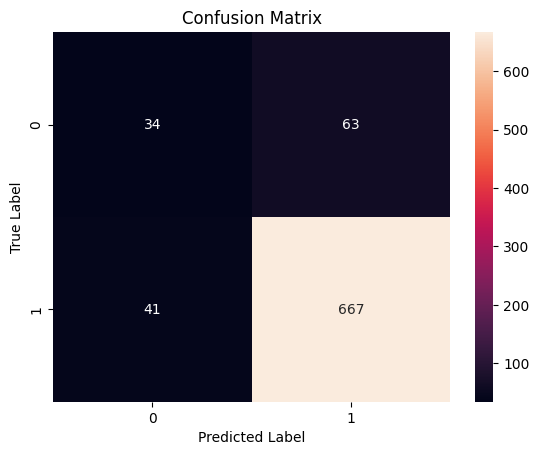

In [ ]:

sns.heatmap(cm5, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC Curve

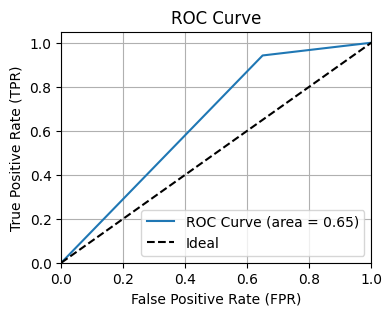

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.45      0.35      0.40        97
           1       0.91      0.94      0.93       708

    accuracy                           0.87       805
   macro avg       0.68      0.65      0.66       805
weighted avg       0.86      0.87      0.86       805



SMOTE Analysis

In [ ]:
df2 = df.copy()

In [ ]:
X2 = df2.drop('Status',axis='columns')
y2 = df.Status

In [ ]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)
X2_scaled

array([[-1.22429611, -0.64036962,  0.28115846, ...,  0.57329087,
         1.33927484, -3.06729118],
       [-0.77796819, -0.64036962,  0.28115846, ...,  1.31415342,
         0.94778552, -3.02365846],
       [ 1.45367139, -0.64036962,  0.28115846, ..., -1.27886548,
        -0.61817175, -3.02365846],
       ...,
       [-0.10847632,  0.35034447, -1.02528685, ..., -1.27886548,
        -0.42242709,  1.55777696],
       [ 0.67259754, -0.64036962, -1.02528685, ..., -0.04409458,
        -0.42242709,  1.55777696],
       [ 0.8957615 ,  0.35034447, -1.02528685, ..., -1.64929675,
        -0.61817175,  1.55777696]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X2_scaled,y2,test_size=0.2,random_state=30)

In [ ]:
print("X_train size: ",X_train.shape)
print("X_test size: ",X_test.shape)
print("y_train size: ",y_train.shape)
print("y_test size: ",y_test.shape)

X_train size:  (3219, 13)
X_test size:  (805, 13)
y_train size:  (3219,)
y_test size:  (805,)


In [ ]:

from imblearn.over_sampling import SMOTE

# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Create an SMOTE instance (adjust k_neighbors as needed)
smote = SMOTE(k_neighbors=5)  # Experiment with different k values

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

# Now you can use X_resampled and y_resampled for training your machine learning model


Class distribution before SMOTE:
Status
1    2700
0     519
Name: count, dtype: int64
Class distribution after SMOTE:
Status
1    2700
0    2700
Name: count, dtype: int64


Performance of model after SMOTE analysis

Logistic Regression

Training of data

In [ ]:
lreg1 = LogisticRegression()
lreg1.fit(X_train,y_train)

LogisticRegression()

Evaluation of Model

Accuracy of Training dataset

In [ ]:
train_pred = lreg1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.8940664802733769

Accuracy of testing set

In [ ]:
test_pred = lreg1.predict(X_test)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9043478260869565

confusion matrix

In [ ]:
cm1 = confusion_matrix(y_test,test_pred)
cm1

array([[ 37,  60],
       [ 17, 691]])

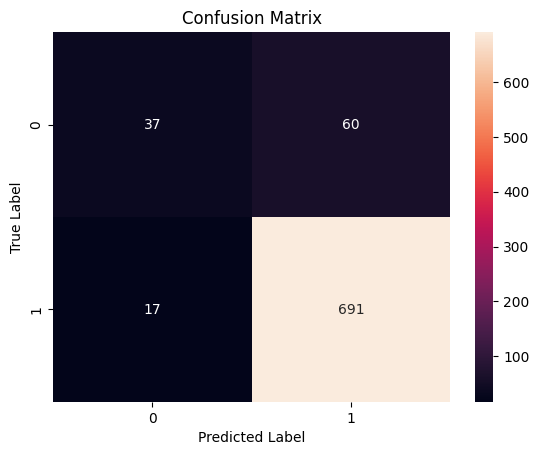

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

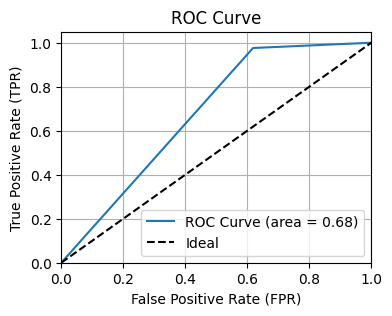

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Area Under ROC Curve

In [ ]:
roc_auc_score(y_test, lreg1.predict(X_test))
roc_auc_score(y_test, lreg1.decision_function(X_test))

0.8594559962723514

In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.69      0.38      0.49        97
           1       0.92      0.98      0.95       708

    accuracy                           0.90       805
   macro avg       0.80      0.68      0.72       805
weighted avg       0.89      0.90      0.89       805



Random Forest

In [ ]:
rf1 = RandomForestClassifier(n_estimators=5)
rf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

Training set accuracy

In [ ]:
train_pred = rf1.predict(X_train)
train_accuracy =  accuracy_score(y_train,train_pred)
train_accuracy

0.9798073936004971

Testing set accuracy

In [ ]:
test_pred = rf1.predict(X_test)
test_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9055900621118013

confusion matrix

In [ ]:
cm2 = confusion_matrix(y_test,test_pred)
cm2

array([[ 45,  52],
       [ 24, 684]])

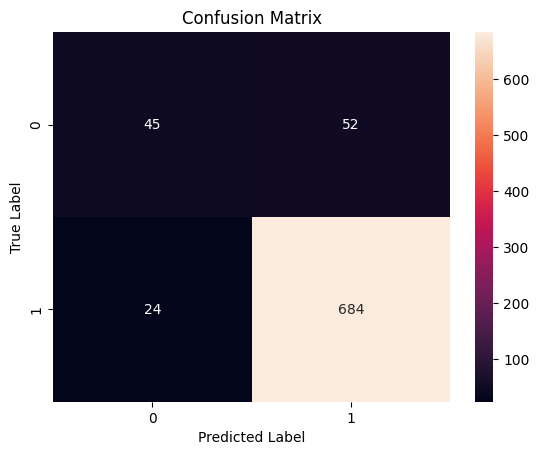

In [ ]:

sns.heatmap(cm2, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

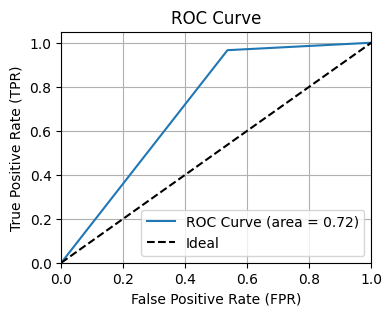

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54        97
           1       0.93      0.97      0.95       708

    accuracy                           0.91       805
   macro avg       0.79      0.72      0.74       805
weighted avg       0.90      0.91      0.90       805



SVM

In [ ]:
svm1 = SVC()
svm1.fit(X_train,y_train)

SVC()

Training set accuracy

In [ ]:
X_train_pred = svm1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.9046287666977322

Testing set accuracy

In [ ]:
test_pred = svm1.predict(X_test)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
testing_accuracy = accuracy_score(y_test,test_pred)
testing_accuracy

0.9093167701863354

confusion matrix

In [ ]:
cm3 = confusion_matrix(y_test,test_pred)
cm3

array([[ 31,  66],
       [  7, 701]])

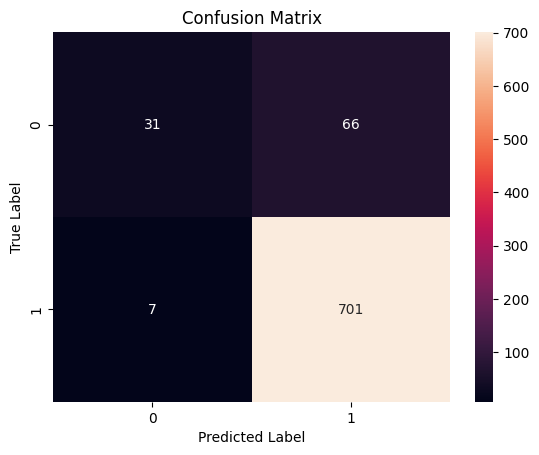

In [ ]:

sns.heatmap(cm3, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

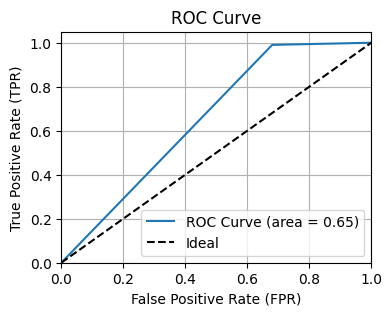

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.82      0.32      0.46        97
           1       0.91      0.99      0.95       708

    accuracy                           0.91       805
   macro avg       0.86      0.65      0.70       805
weighted avg       0.90      0.91      0.89       805



Naive Bayes

In [ ]:
nb1 = BernoulliNB()
nb1.fit(X_train,y_train)

BernoulliNB()

Training set accuracy

In [ ]:
train_pred = nb1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.8117427772600186

Testing set accuracy

In [ ]:
test_pred = nb1.predict(X_test)
test_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.8149068322981367

confusion matrix

In [ ]:
cm4 = confusion_matrix(y_test,test_pred)
cm4

array([[ 42,  55],
       [ 94, 614]])

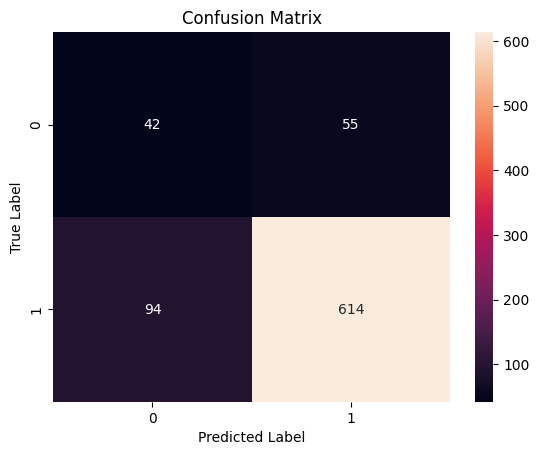

In [ ]:

sns.heatmap(cm4, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

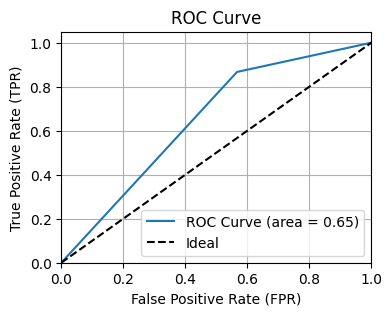

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.31      0.43      0.36        97
           1       0.92      0.87      0.89       708

    accuracy                           0.81       805
   macro avg       0.61      0.65      0.63       805
weighted avg       0.84      0.81      0.83       805



KNN

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train,y_train)

KNeighborsClassifier()

Training set accuracy

In [ ]:
X_train_pred = knn1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.9061820441130786

Testing set accuracy

In [ ]:
X_test_pred = knn1.predict(X_test)
test_accuracy = accuracy_score(y_test,X_test_pred)
test_accuracy

0.8956521739130435

confusion matrix

In [ ]:
cm5 = confusion_matrix(y_test,test_pred)
cm5

array([[ 42,  55],
       [ 94, 614]])

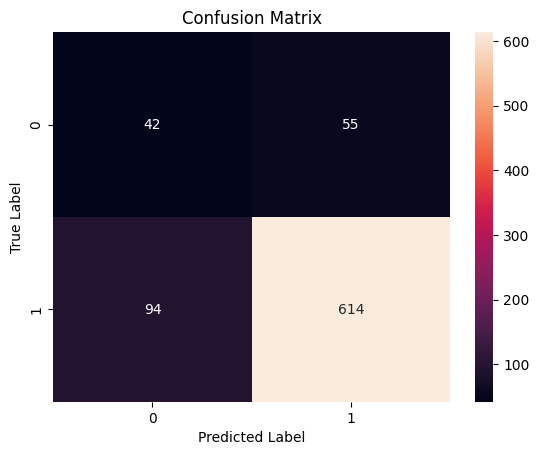

In [ ]:

sns.heatmap(cm5, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC Curve

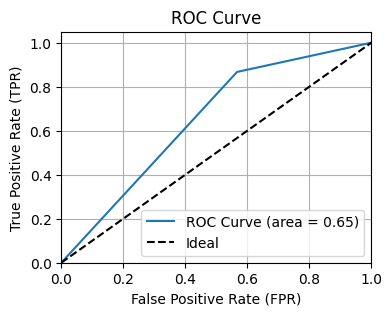

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.31      0.43      0.36        97
           1       0.92      0.87      0.89       708

    accuracy                           0.81       805
   macro avg       0.61      0.65      0.63       805
weighted avg       0.84      0.81      0.83       805

